# Explorační analýza hotelových recenzí

In [1]:
from pathlib import Path
#Výstupní složka pro obohacený model
output_dir = Path("model_categorizer")
if not output_dir.exists():
    output_dir.mkdir()

In [2]:
import pandas as pd #načteme pandas pro nahrání souboru
import seaborn as sns #načteme seaborn pro analýzu dat
import spacy #načteme spacy pro jazykový model
import matplotlib.pyplot as plt
import re

In [3]:
#vyčištění sloupců
df = pd.read_csv("Hotel_Reviews.csv", 
                 index_col=False,
                )

df = df.drop(columns = ["Hotel_Address", 
                        "Additional_Number_of_Scoring",
                        "lat",
                        "lng",
                        "Review_Date"])
df.head(5)

Average_Score   Hotel_Name Reviewer_Nationality  \
0            7.7  Hotel Arena              Russia    
1            7.7  Hotel Arena             Ireland    
2            7.7  Hotel Arena           Australia    
3            7.7  Hotel Arena      United Kingdom    
4            7.7  Hotel Arena         New Zealand    

                                     Negative_Review  \
0   I am so angry that i made this post available...   
1                                        No Negative   
2   Rooms are nice but for elderly a bit difficul...   
3   My room was dirty and I was afraid to walk ba...   
4   You When I booked with your company on line y...   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                397                     1403   
1                                  0                     1403   
2                                 42                     1403   
3                                210                     1403   
4                                140                     1403   

                                     Positive_Review  \
0   Only the park outside of the hotel was beauti...   
1   No real complaints the hotel was great great ...   
2   Location was good and staff were ok It is cut...   
3   Great location in nice surroundings the bar a...   
4    Amazing location and building Romantic setting    

   Review_Total_Positive_Word_Counts  \
0                                 11   
1                                105   
2                                 21   
3                                 26   
4                                  8   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                           7             2.9   
1                                           7             7.5   
2                                           9             7.1   
3                                           1             3.8   
4                                           3             6.7   

                                                Tags days_since_review  
0  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days  
1  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days  
2  [' Leisure trip ', ' Family with young childre...            3 days  
3  [' Leisure trip ', ' Solo traveler ', ' Duplex...            3 days  
4  [' Leisure trip ', ' Couple ', ' Suite ', ' St...           10 days

## Vizualizace dat

<AxesSubplot:xlabel='Reviewer_Score', ylabel='count'>

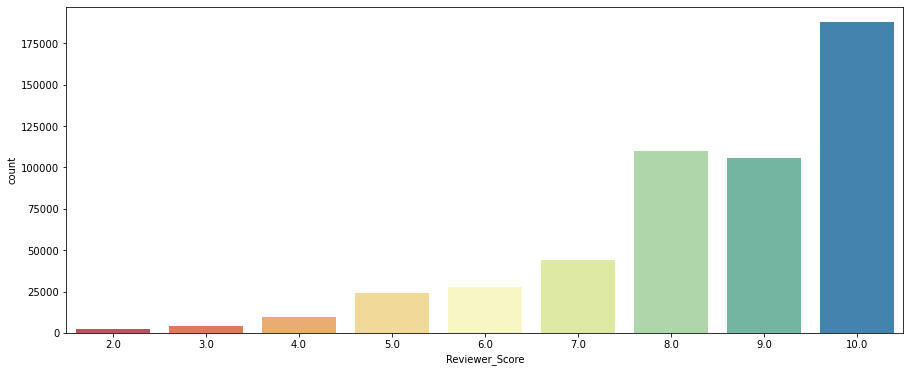

In [4]:
#Reviewer_score
figs,axes=plt.subplots(1,1,figsize=(15,6))
sns.countplot(x="Reviewer_Score", data=df.round(0), palette="Spectral")

<AxesSubplot:>

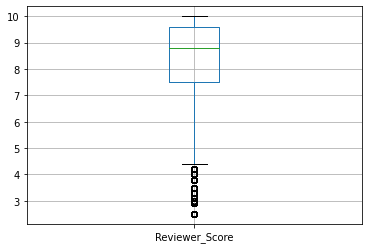

In [5]:
df.boxplot(column=['Reviewer_Score'])

<AxesSubplot:xlabel='Total_Number_of_Reviews_Reviewer_Has_Given', ylabel='Reviewer_Score'>

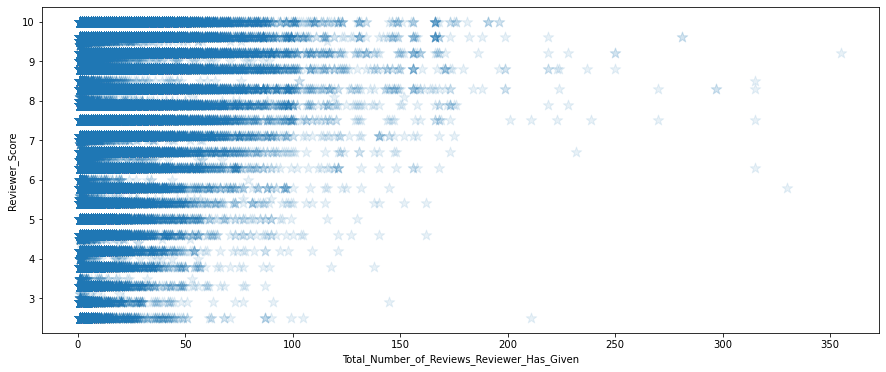

In [6]:
#vztah reviewer score a total reviews given
figs,axes=plt.subplots(1,1,figsize=(15,6))
sns.regplot(x=df["Total_Number_of_Reviews_Reviewer_Has_Given"], y=df["Reviewer_Score"], fit_reg=False, marker="*", scatter_kws={"alpha":0.1,"s":120})

<AxesSubplot:xlabel='Average_Score', ylabel='Review_Total_Negative_Word_Counts'>

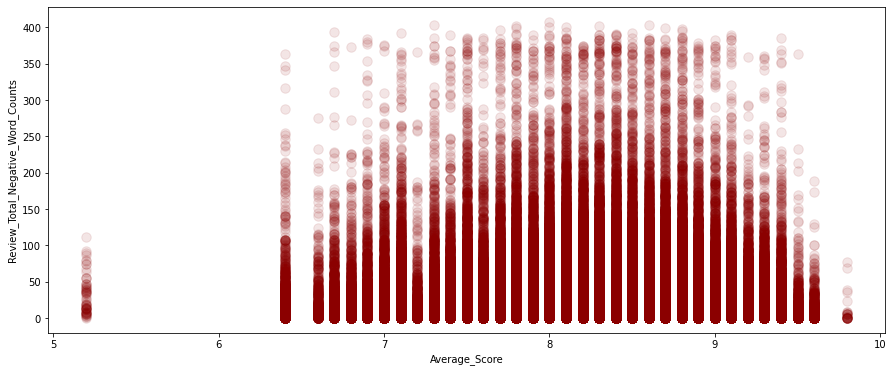

In [7]:
#vztah negativních slov a average score
figs,axes=plt.subplots(1,1,figsize=(15,6))
sns.regplot(x=df["Average_Score"], y=df["Review_Total_Negative_Word_Counts"], fit_reg=False, scatter_kws={"color":"darkred","alpha":0.1,"s":90} )


<AxesSubplot:xlabel='Average_Score', ylabel='Review_Total_Positive_Word_Counts'>

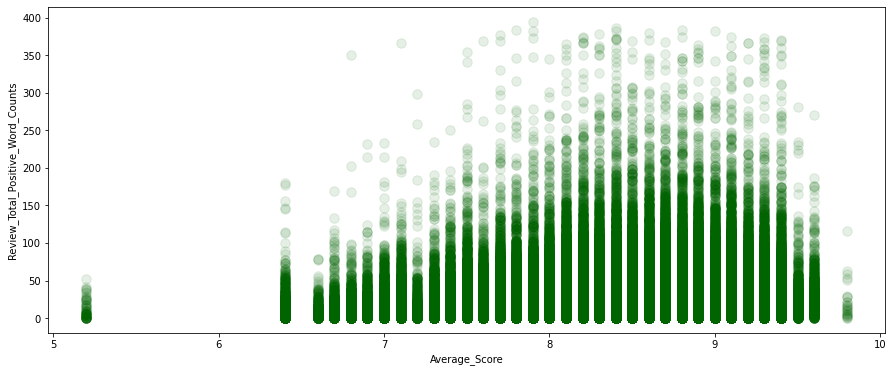

In [8]:
#vztah pozitivních slov a average score
figs,axes=plt.subplots(1,1,figsize=(15,6))
sns.regplot(x=df["Average_Score"], y=df["Review_Total_Positive_Word_Counts"], fit_reg=False, scatter_kws={"color":"darkgreen","alpha":0.1,"s":90} )


In [9]:
#korelační matice
df.corr(method = "pearson")

Average_Score  \
Average_Score                                    1.000000   
Review_Total_Negative_Word_Counts               -0.112323   
Total_Number_of_Reviews                         -0.179568   
Review_Total_Positive_Word_Counts                0.106719   
Total_Number_of_Reviews_Reviewer_Has_Given       0.036454   
Reviewer_Score                                   0.364351   

                                            Review_Total_Negative_Word_Counts  \
Average_Score                                                       -0.112323   
Review_Total_Negative_Word_Counts                                    1.000000   
Total_Number_of_Reviews                                              0.035124   
Review_Total_Positive_Word_Counts                                    0.119613   
Total_Number_of_Reviews_Reviewer_Has_Given                           0.003199   
Reviewer_Score                                                      -0.382474   

                                            Total_Number_of_Reviews  \
Average_Score                                             -0.179568   
Review_Total_Negative_Word_Counts                          0.035124   
Total_Number_of_Reviews                                    1.000000   
Review_Total_Positive_Word_Counts                         -0.030132   
Total_Number_of_Reviews_Reviewer_Has_Given                -0.024910   
Reviewer_Score                                            -0.072865   

                                            Review_Total_Positive_Word_Counts  \
Average_Score                                                        0.106719   
Review_Total_Negative_Word_Counts                                    0.119613   
Total_Number_of_Reviews                                             -0.030132   
Review_Total_Positive_Word_Counts                                    1.000000   
Total_Number_of_Reviews_Reviewer_Has_Given                           0.026535   
Reviewer_Score                                                       0.220800   

                                            Total_Number_of_Reviews_Reviewer_Has_Given  \
Average_Score                                                                 0.036454   
Review_Total_Negative_Word_Counts                                             0.003199   
Total_Number_of_Reviews                                                      -0.024910   
Review_Total_Positive_Word_Counts                                             0.026535   
Total_Number_of_Reviews_Reviewer_Has_Given                                    1.000000   
Reviewer_Score                                                                0.002873   

                                            Reviewer_Score  
Average_Score                                     0.364351  
Review_Total_Negative_Word_Counts                -0.382474  
Total_Number_of_Reviews                          -0.072865  
Review_Total_Positive_Word_Counts                 0.220800  
Total_Number_of_Reviews_Reviewer_Has_Given        0.002873  
Reviewer_Score                                    1.000000

In [10]:
#kontingenční tabulka hotel name a reviewr score
pd.pivot_table(data=df,
               values="Reviewer_Score", 
               aggfunc=["mean", "median", "min", "max", ], 
               index="Hotel_Name", 
               margins=True)

mean         median  \
                                   Reviewer_Score Reviewer_Score   
Hotel_Name                                                         
11 Cadogan Gardens                       8.845283            9.2   
1K Hotel                                 7.861486            8.1   
25hours Hotel beim MuseumsQuartier       8.983309            9.2   
41                                       9.711650           10.0   
45 Park Lane Dorchester Collection       9.603571           10.0   
...                                           ...            ...   
citizenM London Shoreditch               9.092005            9.6   
citizenM Tower of London                 9.135591            9.6   
every hotel Piccadilly                   8.967782            9.6   
pentahotel Vienna                        8.363566            8.8   
All                                      8.395077            8.8   

                                              min            max  
                                   Reviewer_Score Reviewer_Score  
Hotel_Name                                                        
11 Cadogan Gardens                            4.2           10.0  
1K Hotel                                      3.8           10.0  
25hours Hotel beim MuseumsQuartier            2.5           10.0  
41                                            6.7           10.0  
45 Park Lane Dorchester Collection            8.3           10.0  
...                                           ...            ...  
citizenM London Shoreditch                    2.5           10.0  
citizenM Tower of London                      3.0           10.0  
every hotel Piccadilly                        3.3           10.0  
pentahotel Vienna                             2.9           10.0  
All                                           2.5           10.0  

[1493 rows x 4 columns]

## Příprava dat 

In [11]:
#extrakce dní ze sloupce "days_since_review" (nakonec nepoužito)
def find_number(text):
    num = re.findall(r'[0-9]+',text)
    return " ".join(num)
df['days']=df['days_since_review'].apply(lambda x: find_number(x))
print("\Extracting numbers from dataframe columns:")
df.head(5)

\Extracting numbers from dataframe columns:


Average_Score   Hotel_Name Reviewer_Nationality  \
0            7.7  Hotel Arena              Russia    
1            7.7  Hotel Arena             Ireland    
2            7.7  Hotel Arena           Australia    
3            7.7  Hotel Arena      United Kingdom    
4            7.7  Hotel Arena         New Zealand    

                                     Negative_Review  \
0   I am so angry that i made this post available...   
1                                        No Negative   
2   Rooms are nice but for elderly a bit difficul...   
3   My room was dirty and I was afraid to walk ba...   
4   You When I booked with your company on line y...   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                397                     1403   
1                                  0                     1403   
2                                 42                     1403   
3                                210                     1403   
4                                140                     1403   

                                     Positive_Review  \
0   Only the park outside of the hotel was beauti...   
1   No real complaints the hotel was great great ...   
2   Location was good and staff were ok It is cut...   
3   Great location in nice surroundings the bar a...   
4    Amazing location and building Romantic setting    

   Review_Total_Positive_Word_Counts  \
0                                 11   
1                                105   
2                                 21   
3                                 26   
4                                  8   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                           7             2.9   
1                                           7             7.5   
2                                           9             7.1   
3                                           1             3.8   
4                                           3             6.7   

                                                Tags days_since_review days  
0  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days    0  
1  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days    0  
2  [' Leisure trip ', ' Family with young childre...            3 days    3  
3  [' Leisure trip ', ' Solo traveler ', ' Duplex...            3 days    3  
4  [' Leisure trip ', ' Couple ', ' Suite ', ' St...           10 days   10

<AxesSubplot:xlabel='sentiment', ylabel='count'>

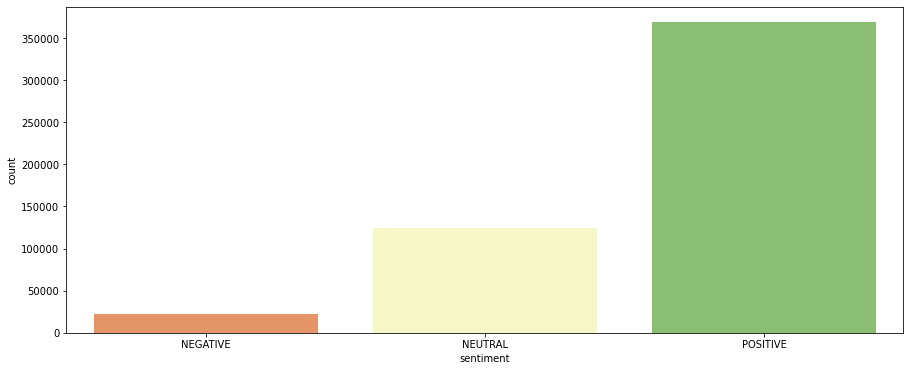

In [12]:
#Úprava dat - sloučení
df["sentiment"] = pd.cut(df["Reviewer_Score"], 
                   bins=[0,4.9,7.5,10], 
                   labels=["NEGATIVE", "NEUTRAL", "POSITIVE"])
figs,axes=plt.subplots(1,1,figsize=(15,6))
sns.countplot(x="sentiment", data=df, palette="RdYlGn")

In [13]:
#definování sentiment typu
df.sentiment.dtype

CategoricalDtype(categories=['NEGATIVE', 'NEUTRAL', 'POSITIVE'], ordered=True)

In [14]:
#rozdělení do tabulky
df.groupby("sentiment").count()

Average_Score  Hotel_Name  Reviewer_Nationality  Negative_Review  \
sentiment                                                                     
NEGATIVE           22281       22281                 22281            22281   
NEUTRAL           124714      124714                124714           124714   
POSITIVE          368743      368743                368743           368743   

           Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
sentiment                                                               
NEGATIVE                               22281                    22281   
NEUTRAL                               124714                   124714   
POSITIVE                              368743                   368743   

           Positive_Review  Review_Total_Positive_Word_Counts  \
sentiment                                                       
NEGATIVE             22281                              22281   
NEUTRAL             124714                             124714   
POSITIVE            368743                             368743   

           Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score    Tags  \
sentiment                                                                       
NEGATIVE                                        22281           22281   22281   
NEUTRAL                                        124714          124714  124714   
POSITIVE                                       368743          368743  368743   

           days_since_review    days  
sentiment                             
NEGATIVE               22281   22281  
NEUTRAL               124714  124714  
POSITIVE              368743  368743

In [15]:
#ukázka sentimentu - Neutral
df[df.sentiment == "NEUTRAL"]

Average_Score             Hotel_Name Reviewer_Nationality  \
1                 7.7            Hotel Arena             Ireland    
2                 7.7            Hotel Arena           Australia    
4                 7.7            Hotel Arena         New Zealand    
5                 7.7            Hotel Arena              Poland    
8                 7.7            Hotel Arena             Belgium    
...               ...                    ...                  ...   
515727            8.1  Atlantis Hotel Vienna      United Kingdom    
515730            8.1  Atlantis Hotel Vienna              Israel    
515731            8.1  Atlantis Hotel Vienna             Germany    
515733            8.1  Atlantis Hotel Vienna              Kuwait    
515734            8.1  Atlantis Hotel Vienna             Estonia    

                                          Negative_Review  \
1                                             No Negative   
2        Rooms are nice but for elderly a bit difficul...   
4        You When I booked with your company on line y...   
5        Backyard of the hotel is total mess shouldn t...   
8        Even though the pictures show very clean room...   
...                                                   ...   
515727         Wifi Location No tea or coffee in the room   
515730   no free parking the room was in another build...   
515731   No parking Public parking garage is 15 Euro p...   
515733   no trolly or staff to help you take the lugga...   
515734           The hotel looks like 3 but surely not 4    

        Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
1                                       0                     1403   
2                                      42                     1403   
4                                     140                     1403   
5                                      17                     1403   
8                                      34                     1403   
...                                   ...                      ...   
515727                                 10                     2823   
515730                                 20                     2823   
515731                                 12                     2823   
515733                                 14                     2823   
515734                                 11                     2823   

                                          Positive_Review  \
1        No real complaints the hotel was great great ...   
2        Location was good and staff were ok It is cut...   
4         Amazing location and building Romantic setting    
5        Good restaurant with modern design great chil...   
8                                             No Positive   
...                                                   ...   
515727   Rather cheap and not to far away from the cen...   
515730                                         large room   
515731                                     Good breakfast   
515733                                           location   
515734      Breakfast was ok and we got earlier check in    

        Review_Total_Positive_Word_Counts  \
1                                     105   
2                                      21   
4                                       8   
5                                      20   
8                                       0   
...                                   ...   
515727                                 15   
515730                                  3   
515731                                  3   
515733                                  2   
515734                                 11   

        Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
1                                                7             7.5   
2                                                9             7.1   
4                                                3             6.7   
5                                                1 

In [16]:
#dropnutí - neutral
indicies_to_drop = df[df.sentiment == "NEUTRAL"].index

indicies_to_drop

Int64Index([     1,      2,      4,      5,      8,     11,     16,     17,
                18,     19,
            ...
            515716, 515721, 515722, 515725, 515726, 515727, 515730, 515731,
            515733, 515734],
           dtype='int64', length=124714)

In [17]:
#kontrola kategorií - tabulka
df = df.drop(indicies_to_drop)

df.groupby("sentiment").count()

Average_Score  Hotel_Name  Reviewer_Nationality  Negative_Review  \
sentiment                                                                     
NEGATIVE           22281       22281                 22281            22281   
NEUTRAL                0           0                     0                0   
POSITIVE          368743      368743                368743           368743   

           Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
sentiment                                                               
NEGATIVE                               22281                    22281   
NEUTRAL                                    0                        0   
POSITIVE                              368743                   368743   

           Positive_Review  Review_Total_Positive_Word_Counts  \
sentiment                                                       
NEGATIVE             22281                              22281   
NEUTRAL                  0                                  0   
POSITIVE            368743                             368743   

           Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score    Tags  \
sentiment                                                                       
NEGATIVE                                        22281           22281   22281   
NEUTRAL                                             0               0       0   
POSITIVE                                       368743          368743  368743   

           days_since_review    days  
sentiment                             
NEGATIVE               22281   22281  
NEUTRAL                    0       0  
POSITIVE              368743  368743

CategoricalDtype(categories=['NEGATIVE', 'POSITIVE'], ordered=True)

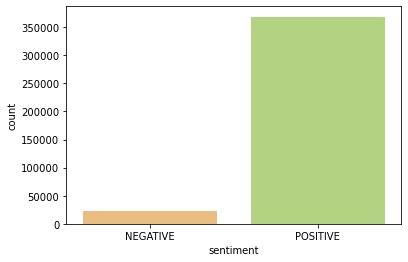

In [18]:
#kontrola kategorií - graf
df.sentiment = df.sentiment.cat.remove_unused_categories()
sns.countplot(x="sentiment", data=df, palette="RdYlGn")
df.sentiment.dtype

In [19]:
#definování Positive a Negative
df_neg = df[df.sentiment=="NEGATIVE"]
df_pos = df[df.sentiment=="POSITIVE"]

In [20]:
#definování samplu rozřazení dat
df_pos1 = df_pos.sample(5000)
df_neg1 = df_neg.sample(5000)

<AxesSubplot:xlabel='sentiment', ylabel='count'>

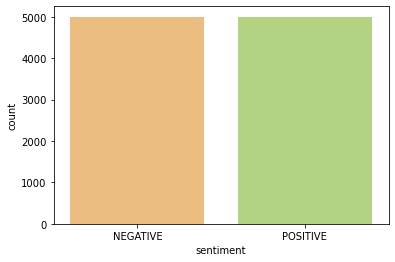

In [21]:
#rozřazení dat - graf
df = pd.concat([df_neg1, df_pos1], ignore_index=True)
sns.countplot(x="sentiment", data=df, palette="RdYlGn")

### Sloučení recenzí 

In [22]:
#očištění sloupců, přiřazení sentimentu k negativním recenzím, příprava dat pro spacy
df_n = df.drop(columns = ["Average_Score",
                       "Reviewer_Nationality",
                       "Review_Total_Negative_Word_Counts",
                       "Total_Number_of_Reviews",
                       "Positive_Review",
                       "Review_Total_Positive_Word_Counts",
                       "Reviewer_Score",
                       "Tags",
                       "days_since_review",
                       "days",
                        "Total_Number_of_Reviews_Reviewer_Has_Given"
                       ])
df_n.rename(columns = {'Negative_Review':'Review'}, inplace = True) 
df_n["sentiment"] = "NEGATIVE"
df_n["cats"] = [{"POSITIVE": y=="POSITIVE", "NEGATIVE": y=="NEGATIVE"} for y in df_n.sentiment]
df_n

Hotel_Name  \
0                                            Ozo Hotel   
1                          Park Grand London Hyde Park   
2                               Novotel Amsterdam City   
3                                Guitart Grand Passage   
4                                  Blakemore Hyde Park   
...                                                ...   
9995          Club Quarters Hotel Lincoln s Inn Fields   
9996                                     The Grosvenor   
9997                           Au Manoir Saint Germain   
9998                       Golden Tulip Amsterdam West   
9999  Best Western The Boltons Hotel London Kensington   

                                                 Review sentiment  \
0      When we arrived we got a room which had no pr...  NEGATIVE   
1      Underground rooms No working AC Dingy atmosphere  NEGATIVE   
2      Noisy poor air conditioining they charge you ...  NEGATIVE   
3      Hotel staff very unfriendly Room was not read...  NEGATIVE   
4      I would have liked to know prior to my journe...  NEGATIVE   
...                                                 ...       ...   
9995                                        No Negative  NEGATIVE   
9996                      The bathroom was very cramped  NEGATIVE   
9997                                 Noise in courtyard  NEGATIVE   
9998   I think hotel needs to introduce veggi hot br...  NEGATIVE   
9999                 Room a bit too warm and too small   NEGATIVE   

                                       cats  
0     {'POSITIVE': False, 'NEGATIVE': True}  
1     {'POSITIVE': False, 'NEGATIVE': True}  
2     {'POSITIVE': False, 'NEGATIVE': True}  
3     {'POSITIVE': False, 'NEGATIVE': True}  
4     {'POSITIVE': False, 'NEGATIVE': True}  
...                                     ...  
9995  {'POSITIVE': False, 'NEGATIVE': True}  
9996  {'POSITIVE': False, 'NEGATIVE': True}  
9997  {'POSITIVE': False, 'NEGATIVE': True}  
9998  {'POSITIVE': False, 'NEGATIVE': True}  
9999  {'POSITIVE': False, 'NEGATIVE': True}  

[10000 rows x 4 columns]

In [23]:
#očištění sloupců, přiřazení sentimentu k pozitivním recenzím, příprava dat pro spacy
df_p = df.drop(columns = ["Average_Score",
                       "Reviewer_Nationality",
                       "Review_Total_Negative_Word_Counts",
                       "Total_Number_of_Reviews",
                       "Negative_Review",
                       "Review_Total_Positive_Word_Counts",
                       "Reviewer_Score",
                       "Tags",
                       "days_since_review",
                       "days",
                        "Total_Number_of_Reviews_Reviewer_Has_Given"
                       ])
df_p.rename(columns = {'Positive_Review':'Review'}, inplace = True)
df_p["sentiment"] = "POSITIVE"
df_p["cats"] = [{"POSITIVE": y=="POSITIVE", "NEGATIVE": y=="NEGATIVE"} for y in df_p.sentiment]
df_p

Hotel_Name  \
0                                            Ozo Hotel   
1                          Park Grand London Hyde Park   
2                               Novotel Amsterdam City   
3                                Guitart Grand Passage   
4                                  Blakemore Hyde Park   
...                                                ...   
9995          Club Quarters Hotel Lincoln s Inn Fields   
9996                                     The Grosvenor   
9997                           Au Manoir Saint Germain   
9998                       Golden Tulip Amsterdam West   
9999  Best Western The Boltons Hotel London Kensington   

                                                 Review sentiment  \
0      Connectivity to the city center is easy but 1...  POSITIVE   
1                                              Location  POSITIVE   
2                                                  Wifi  POSITIVE   
3                                               Nothing  POSITIVE   
4                                           No Positive  POSITIVE   
...                                                 ...       ...   
9995   Great place great location and very pleasant ...  POSITIVE   
9996        The lounge with refreshments the large room  POSITIVE   
9997   Staff especially Aziz was friendly and helpfu...  POSITIVE   
9998   Hotel location was good apart from the road w...  POSITIVE   
9999   Goisa front staff really helpful to help me p...  POSITIVE   

                                       cats  
0     {'POSITIVE': True, 'NEGATIVE': False}  
1     {'POSITIVE': True, 'NEGATIVE': False}  
2     {'POSITIVE': True, 'NEGATIVE': False}  
3     {'POSITIVE': True, 'NEGATIVE': False}  
4     {'POSITIVE': True, 'NEGATIVE': False}  
...                                     ...  
9995  {'POSITIVE': True, 'NEGATIVE': False}  
9996  {'POSITIVE': True, 'NEGATIVE': False}  
9997  {'POSITIVE': True, 'NEGATIVE': False}  
9998  {'POSITIVE': True, 'NEGATIVE': False}  
9999  {'POSITIVE': True, 'NEGATIVE': False}  

[10000 rows x 4 columns]

In [24]:
#sloučení pozitivních a negativních recenzí do jednoho sloupce a zamíchaní
df_final = pd.concat([df_p,df_n])
df_final = df_final.sample(frac=1)
df_final

Hotel_Name  \
4960           Radisson Blu Edwardian Vanderbilt   
4048                                  Henry VIII   
4574      Maison Albar Hotel Paris Op ra Diamond   
108                                 Melia Vienna   
7325                              Ohla Barcelona   
...                                          ...   
3144  Britannia International Hotel Canary Wharf   
3617                             Starhotels Ritz   
7980        Mercure Amsterdam Sloterdijk Station   
9527                    K K Hotel Maria Theresia   
6981                  Park Plaza Victoria London   

                                                 Review sentiment  \
4960   Entering into the hotel lobby it looked fine ...  NEGATIVE   
4048   Being moved from the smallest box room to a s...  POSITIVE   
4574                        Good location easy to reach  POSITIVE   
108                                         No Positive  POSITIVE   
7325                                        No Negative  NEGATIVE   
...                                                 ...       ...   
3144   The menu was limited but the food was generou...  POSITIVE   
3617                                        No Negative  NEGATIVE   
7980                                        No Negative  NEGATIVE   
9527                                   Nothing of note   NEGATIVE   
6981   Cleaning staff should pay more attention on r...  NEGATIVE   

                                       cats  
4960  {'POSITIVE': False, 'NEGATIVE': True}  
4048  {'POSITIVE': True, 'NEGATIVE': False}  
4574  {'POSITIVE': True, 'NEGATIVE': False}  
108   {'POSITIVE': True, 'NEGATIVE': False}  
7325  {'POSITIVE': False, 'NEGATIVE': True}  
...                                     ...  
3144  {'POSITIVE': True, 'NEGATIVE': False}  
3617  {'POSITIVE': False, 'NEGATIVE': True}  
7980  {'POSITIVE': False, 'NEGATIVE': True}  
9527  {'POSITIVE': False, 'NEGATIVE': True}  
6981  {'POSITIVE': False, 'NEGATIVE': True}  

[20000 rows x 4 columns]

### Rozdělení datasetu na trénovací a testovací množinu 

In [25]:
#procentní rozdělení dat na trénovací a testovací 66:34
split = 0.66
split_row = int(len(df_final) * split)
print(split_row)
print(df_final.index)

13200
Int64Index([4960, 4048, 4574,  108, 7325, 6526, 9192, 5163, 2511, 3852,
            ...
            7429, 1754, 2296, 7003, 4781, 3144, 3617, 7980, 9527, 6981],
           dtype='int64', length=20000)


In [26]:
#testovací množina
df_test = df_final[split_row:]
len(df_test)

6800

In [27]:
#trénovací množina
df_train = df_final[:split_row]
len(df_train)

13200

In [28]:
#shluknutí dat k fázi učení
train_data = list(zip(df_train["Review"], [{"cats": cats} for cats in df_train["cats"]]))
test_data = list(zip(df_test["Review"], [{"cats": cats} for cats in df_test["cats"]]))

train_data[:10]

[(' Entering into the hotel lobby it looked fine but after that our experience was very poor particularly that this hotel is rated as four star no way We had booked two separate rooms but the reception staff tried to fob us off with a twin room Both of the rooms allocated were red hot and we were unable to open the windows of either room to let some fresh air in Reception were contacted to try and rectify the problem one room had the heating adjusted down the other remained red hot despite reception being notified again and asked to attend to it while we were at our evening meeting so a sleepless night in oven like conditions The rooms were dusty so cleanliness not of the best standard and very small in size so much so it was a squeeze along the side of the bed to close the curtains as the mattress was plonked onto a wooden box base The reception staff had a take it or leave it attitude You would be best looking elsewhere for a better service Premier Inn is a better stay and the rooms 

In [29]:
import spacy
nlp = spacy.load("en_core_web_md")

In [30]:
textcat = nlp.create_pipe("textcat",
                          config={"exclusive_classes": True,
                                  "architecture": "simple_cnn"})
nlp.add_pipe(textcat, last=True)

textcat.add_label("POSITIVE")
textcat.add_label("NEGATIVE")

textcat.labels # výpis pro ověření

('POSITIVE', 'NEGATIVE')

In [31]:
from spacy.util import minibatch, compounding
batch_sizes = compounding(1.0, 4.0, 1.5)
for batch in minibatch(train_data[1:5], size=batch_sizes):
    print("\nbatch:", len(batch), batch)


batch: 1 [(' Being moved from the smallest box room to a slightly bigger but still amazingly small room ', {'cats': {'POSITIVE': True, 'NEGATIVE': False}})]

batch: 1 [(' Good location easy to reach', {'cats': {'POSITIVE': True, 'NEGATIVE': False}})]

batch: 2 [('No Positive', {'cats': {'POSITIVE': True, 'NEGATIVE': False}}), ('No Negative', {'cats': {'POSITIVE': False, 'NEGATIVE': True}})]


In [32]:
n_iter = 50
dropout = 0.7

In [33]:
# získaní jmen ostatních pipes pro vyřazení v průběhu terénování
pipe_exceptions = ["textcat"]
other_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]

In [34]:
from sklearn import metrics # funkce pro skóring
import matplotlib.pyplot as plt # pro přístup k zobrazování grafu v iteracích
import numpy as np # numpy pro generování náhodných čísel
import random # pro zamíchání příklady

## Učení modelu 

In [35]:
score = pd.DataFrame() # dataframe pro výsledky
print("trénink", end="") # začátek tisku průběhu na řádek

with nlp.disable_pipes(other_pipes):  # s dočasně vypnutými ostatními pipes
    
    optimizer = nlp.begin_training() # vytvoření optimalizátoru    
    
    for i in range(n_iter): # iterace přes celou tréninkovou množinu (epocha)
        print(".", end="") # tisk průběhu další iterace na řádek
        losses = {} # příprava pro ukládání informací o ztrátách        
        random.shuffle(train_data) # zamíchání tréninkovou množinou
        
        batch_sizes = compounding(8.0, 40.0, 1.2) # inicializace počtu příkladů ve várkách
        batches = minibatch(train_data, size=batch_sizes) # načtení příkladů ve várkách
        
        for batch in batches: # učení se na každé várce 
            texts, annotations = zip(*batch) # uložení polí dvojic do dvou separátních polí
            
            nlp.update(texts, annotations, sgd=optimizer, drop=dropout, losses=losses) # samotné učení
        
        with textcat.model.use_params(optimizer.averages): # s dočasnou aplikací aktualizovaného modelu
            scorer = nlp.evaluate(test_data) # evaluace modelu na testovacích datech
            
            # vyplnění tabulky se skórem modelu v iteraci
            score.loc[i, "loss"] = losses["textcat"] # zapsání končené ztráty do tabulky
            score.loc[i,"F"] = scorer.textcat_score            
            score.loc[i,"P+"] = scorer.textcats_per_cat["POSITIVE"]["p"]
            score.loc[i,"R+"] = scorer.textcats_per_cat["POSITIVE"]["r"]
            score.loc[i,"F+"] = scorer.textcats_per_cat["POSITIVE"]["f"]
            score.loc[i,"P-"] = scorer.textcats_per_cat["NEGATIVE"]["p"]
            score.loc[i,"R-"] = scorer.textcats_per_cat["NEGATIVE"]["r"]
            score.loc[i,"F-"] = scorer.textcats_per_cat["NEGATIVE"]["f"]
            
            #alternativní skórování pomocí ROC a balíčku sklearn
            docs_generator = nlp.pipe(df_test["Review"]) # dávkové zpracování testovacích dokumentů
            docs = list(docs_generator) # načtení testovacích dokumentů do listu
            scores = [doc.cats["POSITIVE"] for doc in docs] # načtení sentimentu do listu
            
            # kalkulace ROC
            fpr, tpr, thresholds = metrics.roc_curve(y_true = df_test["sentiment"], 
                                                     y_score = scores, 
                                                     pos_label = "POSITIVE")
            
            # vyplnění tabulky se skórem modelu v iteraci
            score.loc[i,"AUC"] = metrics.auc(fpr, tpr)
            
score #zobrazení tabulky se skóre po celém učení

trénink..................................................

loss          F         P+         R+         F+         P-  \
0   0.093627  86.881757  91.080278  81.664692  86.115883  83.593957   
1   0.061554  88.346327  89.607603  86.581754  88.068695  87.196156   
2   0.047696  88.950996  90.003048  87.470379  88.718642  87.979540   
3   0.049232  89.058184  89.027284  88.921801  88.974511  89.089848   
4   0.042302  88.999497  88.898757  88.951422  88.925081  89.099942   
5   0.042910  89.204865  89.338892  88.862559  89.100089  89.076119   
6   0.041363  89.205545  89.013585  89.277251  89.145223  89.396602   
7   0.041552  89.249646  89.069424  89.306872  89.187990  89.428990   
8   0.046039  89.235025  88.997050  89.366114  89.181200  89.472141   
9   0.039136  89.396778  89.170847  89.514218  89.342203  89.621812   
10  0.042866  89.367365  89.141340  89.484597  89.312639  89.592495   
11  0.037564  89.529234  89.222615  89.751185  89.486119  89.835488   
12  0.036058  89.529234  89.222615  89.751185  89.486119  89.835488   
13  0.035703  89.690989  89.396171  89.899289  89.647024  89.985316   
14  0.040917  89.631976  89.476796  89.662322  89.569463  89.786362   
15  0.032721  89.543808  89.341600  89.632701  89.486914  89.745092   
16  0.039846  89.572744  89.628529  89.336493  89.482273  89.519651   
17  0.033984  89.631723  89.617324  89.484597  89.550912  89.647127   
18  0.034408  89.499338  89.495549  89.336493  89.415950  89.504373   
19  0.031954  89.528751  89.525223  89.366114  89.445597  89.533528   
20  0.032293  89.455089  89.509658  89.218009  89.363596  89.403202   
21  0.033016  89.528484  89.642857  89.218009  89.429929  89.418605   
22  0.029535  89.543162  89.669545  89.218009  89.443207  89.421680   
23  0.030643  89.484392  89.586433  89.188389  89.386967  89.386450   
24  0.030571  89.440511  89.436202  89.277251  89.356656  89.446064   
25  0.030058  89.425504  89.550461  89.099526  89.324425  89.305434   
26  0.030766  89.278605  89.331352  89.040284  89.185581  89.228530   
27  0.034005  89.455141  89.486189  89.247630  89.366751  89.426158   
28  0.030637  89.425876  89.386303  89.306872  89.346570  89.466005   
29  0.032046  89.426158  89.223502  89.514218  89.368623  89.627893   
30  0.026654  89.352643  89.138135  89.454976  89.296274  89.566237   
31  0.028434  89.249682  89.046354  89.336493  89.191187  89.452095   
32  0.030482  89.308540  89.082325  89.425355  89.253511  89.533861   
33  0.027236  89.382021  89.190786  89.454976  89.322686  89.572349   
34  0.029796  89.367332  89.164452  89.454976  89.309478  89.569294   
35  0.026889  89.323293  89.062500  89.484597  89.273050  89.583333   
36  0.024798  89.352734  89.068945  89.543839  89.305761  89.635937   
37  0.029965  89.249831  88.931410  89.484597  89.207146  89.568028   
38  0.029426  89.220418  88.901972  89.454976  89.177617  89.538642   
39  0.024981  89.176312  88.846380  89.425355  89.134928  89.506173   
40  0.028141  89.235056  88.974057  89.395735  89.184397  89.495305   
41  0.026500  89.234958  89.043119  89.306872  89.174800  89.425893   
42  0.025350  89.279159  89.029785  89.425355  89.227132  89.527721   
43  0.025756  89.279243  88.960848  89.514218  89.236675  89.597414   
44  0.025025  89.161618  88.820241  89.425355  89.121771  89.503087   
45  0.024665  89.102794  88.761400  89.366114  89.062731  89.444281   
46  0.025629  89.014666  88.537086  89.454976  88.993664  89.495426   
47  0.029004  89.073501  88.573103  89.543839  89.055826  89.577797   
48  0.025054  89.029388  88.517868  89.514218  89.013255  89.545186   
49  0.028013  88.999976  88.488576  89.484597  88.983800  89.515653   

           R-         F-       AUC  
0   92.114486  87.647631  0.938917  
1   90.099299  88.623959  0.947955  
2   90.420561  89.183350  0.951562  
3   89.193925  89.141856  0.955309  
4   89.047897  89.073912  0.956029  
5   89.544393  89.309642  0.956508  
6   89.135514  89.265867  0.957128  
7   89.193925  89.311303  0.957986  
8   89.106308  89.288850  0.957825  
9   89.281542  8

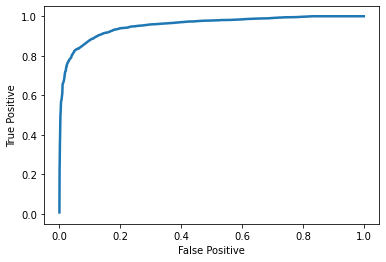

In [36]:
#alternativní skórování pomocí ROC a balíčku sklearn
docs_generator = nlp.pipe(df_test["Review"]) # dávkové zpracování testovacích dokumentů
docs = list(docs_generator) # načtení testovacích dokumentů do listu
scores = [doc.cats["POSITIVE"] for doc in docs] # načtení sentimentu do listu

# kalkulace ROC
fpr, tpr, thresholds = metrics.roc_curve(y_true = df_test["sentiment"], 
                                         y_score = scores, 
                                         pos_label = "POSITIVE")

# zobrazení ROC grafu
roc_plot = sns.lineplot(x=fpr, y=tpr, linewidth=2.5)
roc_plot.set(xlabel='False Positive', ylabel='True Positive')
plt.show() # zobrazení křivky za běhu buňky

In [37]:
#uložení modelu do definovaného úložiště
with nlp.use_params(optimizer.averages):
    nlp.to_disk(output_dir)
print("Saved model to", output_dir)

Saved model to model_categorizer


## Testování modelu 

In [38]:
#testovací hodnoty
examples = pd.DataFrame(["The rooms were clean.", "They went over and beyond to help make our stay enjoyable.",
                         "The breakfast is one of the best I have ever had in Europe.",
                         "I highly recommend this hotel for anyone visiting downtown", 
                         "We got to hotel super early", "The sevice was exceptional as well.",
                         "Every staff member I encountered were delightful and eager to help!",
                         "The bed was extremely comfortable.","4iz481 was super exciting", "The room was spacious and clean.",
                         "Beautiful atmosphere inside and outside around that part of the city.",
                         "Everything what you need is possible.", "The room was huge, modern, and spotless.",
                         "This is a beautiful hotel!", "The environment was pleasant and welcoming.",
                         "We could park our motorcycles in the closed garage.", "Great value for money.",
                         "Must definitelly recommend breakfast, good food and variety of it.",
                         "Hot water constantly running out.", "barely slept during 4iz481", "Virtually no cooking utensils",
                         "Beds were extremely uncomfortable", "Pillows were solid hurting your neck when you slept.",
                         "My kid broke his arm there.", "Worst hotel I've stayed in.", "No Wi-Fi inside rooms.",
                         "Fridge was dirty and horrible and the bottom of it was rusty.", "Back-pain guaranteed.",
                         "Only way to let some fresh air inside is to open the main door.", 
                         "Limited hot water in apartments", "Barely slept all week.", 
                         "Staff are extremely rude and unhelpful", "Majority of hotel staff were miserable",
                         "Rooms smelt of cheap air freshener in an attempt to cover up a bad smell.",
                         "Furniture was cheap and didn't match (not a big deal)", "Smells very very ugly from bathroom.",
                         "standards were below what we were expecting."
                        ], 
                        columns=["text"])
examples

text
0                               The rooms were clean.
1   They went over and beyond to help make our sta...
2   The breakfast is one of the best I have ever h...
3   I highly recommend this hotel for anyone visit...
4                         We got to hotel super early
5                 The sevice was exceptional as well.
6   Every staff member I encountered were delightf...
7                  The bed was extremely comfortable.
8                           4iz481 was super exciting
9                    The room was spacious and clean.
10  Beautiful atmosphere inside and outside around...
11              Everything what you need is possible.
12           The room was huge, modern, and spotless.
13                         This is a beautiful hotel!
14        The environment was pleasant and welcoming.
15  We could park our motorcycles in the closed ga...
16                             Great value for money.
17  Must definitelly recommend breakfast, good foo...
18                  Hot water constantly running out.
19                         barely slept during 4iz481
20                      Virtually no cooking utensils
21                  Beds were extremely uncomfortable
22  Pillows were solid hurting your neck when you ...
23                        My kid broke his arm there.
24                        Worst hotel I've stayed in.
25                             No Wi-Fi inside rooms.
26  Fridge was dirty and horrible and the bottom o...
27                              Back-pain guaranteed.
28  Only way to let some fresh air inside is to op...
29                    Limited hot water in apartments
30                             Barely slept all week.
31             Staff are extremely rude and unhelpful
32             Majority of hotel staff were miserable
33  Rooms smelt of cheap air freshener in an attem...
34  Furniture was cheap and didn't match (not a bi...
35               Smells very very ugly from bathroom.
36       standards were below what we were expecting.

In [39]:
#výpočet sentiment score
def evaluate(row, nlp=nlp):
    row["sentiment_score"]=nlp(row["text"]).cats["POSITIVE"]    
    return row

In [40]:
examples = examples.apply(evaluate, nlp=nlp, axis=1)

examples["sentiment"] = pd.cut(examples["sentiment_score"], 
                   bins=[0,0.4,0.6,1], 
                   labels=["NEGATIVE", "NEUTRAL", "POSITIVE"])
examples

text  sentiment_score  \
0                               The rooms were clean.         0.999927   
1   They went over and beyond to help make our sta...         0.999444   
2   The breakfast is one of the best I have ever h...         0.929021   
3   I highly recommend this hotel for anyone visit...         0.999744   
4                         We got to hotel super early         0.822834   
5                 The sevice was exceptional as well.         0.999983   
6   Every staff member I encountered were delightf...         0.991585   
7                  The bed was extremely comfortable.         0.999983   
8                           4iz481 was super exciting         0.642791   
9                    The room was spacious and clean.         0.999986   
10  Beautiful atmosphere inside and outside around...         0.903855   
11              Everything what you need is possible.         0.008956   
12           The room was huge, modern, and spotless.         0.998547   
13                         This is a beautiful hotel!         0.999103   
14        The environment was pleasant and welcoming.         0.999999   
15  We could park our motorcycles in the closed ga...         0.126252   
16                             Great value for money.         0.981730   
17  Must definitelly recommend breakfast, good foo...         0.999845   
18                  Hot water constantly running out.         0.000553   
19                         barely slept during 4iz481         0.000034   
20                      Virtually no cooking utensils         0.000002   
21                  Beds were extremely uncomfortable         0.001129   
22  Pillows were solid hurting your neck when you ...         0.000428   
23                        My kid broke his arm there.         0.001190   
24                        Worst hotel I've stayed in.         0.485150   
25                             No Wi-Fi inside rooms.         0.000294   
26  Fridge was dirty and horrible and the bottom o...         0.018353   
27                              Back-pain guaranteed.         0.026036   
28  Only way to let some fresh air inside is to op...         0.000279   
29                    Limited hot water in apartments         0.041455   
30                             Barely slept all week.         0.011349   
31             Staff are extremely rude and unhelpful         0.000641   
32             Majority of hotel staff were miserable         0.006398   
33  Rooms smelt of cheap air freshener in an attem...         0.244161   
34  Furniture was cheap and didn't match (not a bi...         0.138903   
35               Smells very very ugly from bathroom.         0.000772   
36       standards were below what we were expecting.         0.002523   

   sentiment  
0   POSITIVE  
1   POSITIVE  
2   POSITIVE  
3   POSITIVE  
4   POSITIVE  
5   POSITIVE  
6   POSITIVE  
7   POSITIVE  
8   POSITIVE  
9   POSITIVE  
10  POSITIVE  
11  NEGATIVE  
12  POSITIVE  
13  POSITIVE  
14  POSITIVE  
15  NEGATIVE  
16  POSITIVE  
17  POSITIVE  
18  NEGATIVE  
19  NEGATIVE  
20  NEGATIVE  
21  NEGATIVE  
22  NEGATIVE  
23  NEGATIVE  
24   NEUTRAL  
25  NEGATIVE  
26  NEGATIVE  
27  NEGATIVE  
28  NEGATIVE  
29  NEGATIVE  
30  NEGATIVE  
31  NEGATIVE  
32  NEGATIVE  
33  NEGATIVE  
34  NEGATIVE  
35  NEGATIVE  
36  NEGATIVE

# Byzyns analýza

In [41]:
#propojení výsledků modelu se jménem hotelu
import numpy as np
random_hotels = np.random.choice(["Hotel Arena", "Hotel SB Icaria Barcelona", "Hotel de France Wien"], 
                                 size=len(examples.index))

examples.loc[:,"hotel"] = pd.Series(random_hotels, dtype="category")
examples

text  sentiment_score  \
0                               The rooms were clean.         0.999927   
1   They went over and beyond to help make our sta...         0.999444   
2   The breakfast is one of the best I have ever h...         0.929021   
3   I highly recommend this hotel for anyone visit...         0.999744   
4                         We got to hotel super early         0.822834   
5                 The sevice was exceptional as well.         0.999983   
6   Every staff member I encountered were delightf...         0.991585   
7                  The bed was extremely comfortable.         0.999983   
8                           4iz481 was super exciting         0.642791   
9                    The room was spacious and clean.         0.999986   
10  Beautiful atmosphere inside and outside around...         0.903855   
11              Everything what you need is possible.         0.008956   
12           The room was huge, modern, and spotless.         0.998547   
13                         This is a beautiful hotel!         0.999103   
14        The environment was pleasant and welcoming.         0.999999   
15  We could park our motorcycles in the closed ga...         0.126252   
16                             Great value for money.         0.981730   
17  Must definitelly recommend breakfast, good foo...         0.999845   
18                  Hot water constantly running out.         0.000553   
19                         barely slept during 4iz481         0.000034   
20                      Virtually no cooking utensils         0.000002   
21                  Beds were extremely uncomfortable         0.001129   
22  Pillows were solid hurting your neck when you ...         0.000428   
23                        My kid broke his arm there.         0.001190   
24                        Worst hotel I've stayed in.         0.485150   
25                             No Wi-Fi inside rooms.         0.000294   
26  Fridge was dirty and horrible and the bottom o...         0.018353   
27                              Back-pain guaranteed.         0.026036   
28  Only way to let some fresh air inside is to op...         0.000279   
29                    Limited hot water in apartments         0.041455   
30                             Barely slept all week.         0.011349   
31             Staff are extremely rude and unhelpful         0.000641   
32             Majority of hotel staff were miserable         0.006398   
33  Rooms smelt of cheap air freshener in an attem...         0.244161   
34  Furniture was cheap and didn't match (not a bi...         0.138903   
35               Smells very very ugly from bathroom.         0.000772   
36       standards were below what we were expecting.         0.002523   

   sentiment                      hotel  
0   POSITIVE                Hotel Arena  
1   POSITIVE  Hotel SB Icaria Barcelona  
2   POSITIVE                Hotel Arena  
3   POSITIVE       Hotel de France Wien  
4   POSITIVE                Hotel Arena  
5   POSITIVE       Hotel de France Wien  
6   POSITIVE       Hotel de France Wien  
7   POSITIVE       Hotel de France Wien  
8   POSITIVE       Hotel de France Wien  
9   POSITIVE                Hotel Arena  
10  POSITIVE       Hotel de France Wien  
11  NEGATIVE                Hotel Arena  
12  POSITIVE  Hotel SB Icaria Barcelona  
13  POSITIVE  Hotel SB Icaria Barcelona  
14  POSITIVE  Hotel SB Icaria Barcelona  
15  NEGATIVE                Hotel Arena  
16  POSITIVE  Hotel SB Icaria Barcelona  
17  POSITIVE       Hotel de France Wien  
18  NEGATIVE                Hotel Arena  
19  NEGATIVE  Hotel SB Icaria Barcelona  
20  NEGATIVE                Hotel Arena  
21  NEGATIVE  Hotel SB Icaria Barcelona  
22  NEGATIVE       Hotel de France Wien  
23  NEGATIVE  Hotel SB Icaria Barcelona  
24   NEUTRAL                Hotel Arena  
25  NEGATIVE       Hotel de France Wien  
26  NEGATIVE       Hotel de France Wien  
27  NEGATIVE                Hotel Arena  
28  NEGATIVE      

In [42]:
#kontrola
examples.hotel.dtype

CategoricalDtype(categories=['Hotel Arena', 'Hotel SB Icaria Barcelona',
                  'Hotel de France Wien'],
                 ordered=False)

<AxesSubplot:xlabel='hotel', ylabel='count'>

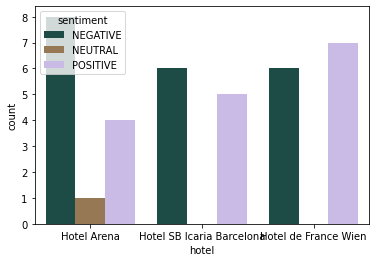

In [43]:
#vizualizace vzorkových hotelů
sns.countplot(x="hotel", hue="sentiment", data=examples, palette="cubehelix")

# Google API analýza entit

In [44]:
from google.cloud import language_v1
from google.oauth2 import service_account

In [45]:
creds = service_account.Credentials.from_service_account_file('./credentials.json')

In [46]:
client = language_v1.LanguageServiceClient(credentials=creds)

In [47]:
#definování analyze entity
def analyze_entity(text):
    language = "en"
    type_ = language_v1.Document.Type.PLAIN_TEXT
    encoding_type = language_v1.EncodingType.UTF8
    document = {"content": text, "type_": type_, "language": language}
    response = client.analyze_entities(request = {'document': document, 'encoding_type': encoding_type})
    return response

In [48]:
#filtrace negativního sentimentu
df_negative = df.loc[df["sentiment"]=="NEGATIVE"]
print(df_negative)

      Average_Score                                  Hotel_Name  \
0               7.6                                   Ozo Hotel   
1               7.5                 Park Grand London Hyde Park   
2               7.8                      Novotel Amsterdam City   
3               8.1                       Guitart Grand Passage   
4               8.5                         Blakemore Hyde Park   
...             ...                                         ...   
4995            8.0  Axel Hotel Barcelona Urban Spa Adults Only   
4996            8.4       M venpick Hotel Amsterdam City Centre   
4997            7.8                  Best Western Aulivia Op ra   
4998            8.4               Park Plaza County Hall London   
4999            7.8         Holiday Inn London Kensington Forum   

        Reviewer_Nationality  \
0      United Arab Emirates    
1            United Kingdom    
2                    Kuwait    
3                    Mexico    
4                   Germany    
...

In [49]:
#odebrání "no negative"
df_negative = df_negative[~df_negative["Negative_Review"].str.contains("No negative")]
df_negative

Average_Score                                  Hotel_Name  \
0               7.6                                   Ozo Hotel   
1               7.5                 Park Grand London Hyde Park   
2               7.8                      Novotel Amsterdam City   
3               8.1                       Guitart Grand Passage   
4               8.5                         Blakemore Hyde Park   
...             ...                                         ...   
4995            8.0  Axel Hotel Barcelona Urban Spa Adults Only   
4996            8.4       M venpick Hotel Amsterdam City Centre   
4997            7.8                  Best Western Aulivia Op ra   
4998            8.4               Park Plaza County Hall London   
4999            7.8         Holiday Inn London Kensington Forum   

        Reviewer_Nationality  \
0      United Arab Emirates    
1            United Kingdom    
2                    Kuwait    
3                    Mexico    
4                   Germany    
...                      ...   
4995                 France    
4996         United Kingdom    
4997   United Arab Emirates    
4998         United Kingdom    
4999         United Kingdom    

                                        Negative_Review  \
0      When we arrived we got a room which had no pr...   
1      Underground rooms No working AC Dingy atmosphere   
2      Noisy poor air conditioining they charge you ...   
3      Hotel staff very unfriendly Room was not read...   
4      I would have liked to know prior to my journe...   
...                                                 ...   
4995                                         Everything   
4996   Long queues at check in and check out Staff n...   
4997   The rooms are extremely small The area is may...   
4998   The bathroom smelt due to the shower which sm...   
4999   The hotel room was extremely run down and gru...   

      Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                    85                     3383   
1                                     8                     1891   
2                                    16                     2501   
3                                   119                      867   
4                                    30                     6596   
...                                 ...                      ...   
4995                                  2                     2694   
4996                                 79                     1925   
4997                                 35                      570   
4998                                 23                     6117   
4999                                 43                     3867   

                                        Positive_Review  \
0      Connectivity to the city center is easy but 1...   
1                                              Location   
2                                                  Wifi   
3                                               Nothing   
4                                           No Positive   
...                                                 ...   
4995                                            Nothing   
4996                 nice clean room and sauna was good   
4997                                            Nothing   
4998                                        No Positive   
4999        It was close to tube station great location   

      Review_Total_Positive_Word_Counts  \
0                                    13   
1                                     2   
2                                     2   
3                                     2   
4                                     0   
...                                 ...   
4995                                  2   
4996                                  8   
4997                                  2   
4998                                  0   
4999                                  9   

      Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score

In [50]:
#analýza entit negativního hodnocení a následné ukládáí do proměnné
counter = 1
length = len(df_negative.index)
safe = []

while counter < 50:
    response = analyze_entity(df_negative["Negative_Review"].values[counter])
    for entity in response.entities:
        if language_v1.Entity.Type(entity.type_).name:
            safe.append([format(entity.name),format(language_v1.Entity.Type(entity.type_).name),format(df_negative["Hotel_Name"].values[counter])])
    counter += 1
print(counter)

50


In [51]:
#uložení do nového df
df_entity = pd.DataFrame(safe, columns=["Název entity", "Typ entity", "Hotel Name"])
df_entity.head(10)

Název entity    Typ entity                   Hotel Name
0              rooms      LOCATION  Park Grand London Hyde Park
1         atmosphere         OTHER  Park Grand London Hyde Park
2           AC Dingy  ORGANIZATION  Park Grand London Hyde Park
3  air conditioining         OTHER       Novotel Amsterdam City
4             porter        PERSON       Novotel Amsterdam City
5            luggage         OTHER       Novotel Amsterdam City
6               Room      LOCATION        Guitart Grand Passage
7        Hotel staff        PERSON        Guitart Grand Passage
8             people        PERSON        Guitart Grand Passage
9             Sheets         OTHER        Guitart Grand Passage

<AxesSubplot:xlabel='Typ entity', ylabel='count'>

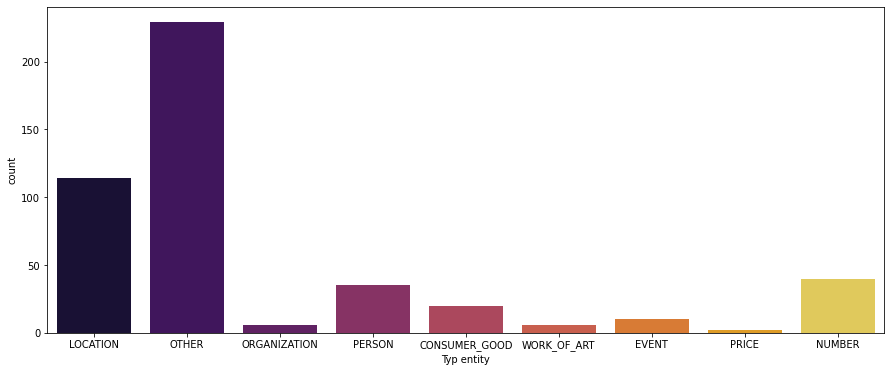

In [63]:
figs,axes=plt.subplots(1,1,figsize=(15,6))
sns.countplot(x="Typ entity", data=df_entity, palette="inferno")

<AxesSubplot:xlabel='Typ entity', ylabel='count'>

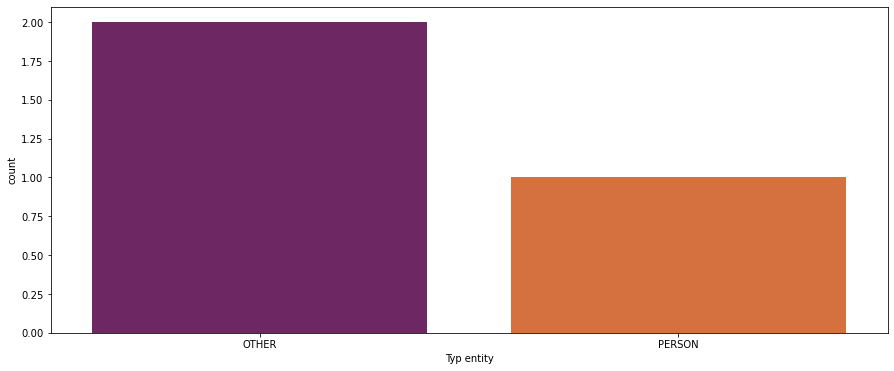

In [65]:
#filtrování pro modelový hotel
our_hotel = (df_entity.loc[df_entity['Hotel Name'] == 'Novotel Amsterdam City'])
#vizualizace
figs,axes=plt.subplots(1,1,figsize=(15,6))
sns.countplot(x="Typ entity", data=our_hotel, palette="inferno")

In [55]:
#výsledky analýzy včetně skóre
counter = 1
length = len(df_negative.index)

while counter < 50:
    response = analyze_entity(df_negative["Negative_Review"].values[counter])
    for entity in response.entities:
        if language_v1.Entity.Type(entity.type_).name:
            print(u"Název entity: {} - Typ entity: {} - Skóre: {}".format(
                entity.name,
                language_v1.Entity.Type(entity.type_).name,
                entity.salience))
    counter += 1
print(counter)

Název entity: rooms - Typ entity: LOCATION - Skóre: 0.6004816889762878
Název entity: atmosphere - Typ entity: OTHER - Skóre: 0.3126435875892639
Název entity: AC Dingy - Typ entity: ORGANIZATION - Skóre: 0.08687473088502884
Název entity: air conditioining - Typ entity: OTHER - Skóre: 0.4864500164985657
Název entity: porter - Typ entity: PERSON - Skóre: 0.3169691562652588
Název entity: luggage - Typ entity: OTHER - Skóre: 0.19658082723617554
Název entity: Room - Typ entity: LOCATION - Skóre: 0.13299542665481567
Název entity: Hotel staff - Typ entity: PERSON - Skóre: 0.09634258598089218
Název entity: people - Typ entity: PERSON - Skóre: 0.09634258598089218
Název entity: Sheets - Typ entity: OTHER - Skóre: 0.08518651872873306
Název entity: Reservation - Typ entity: PERSON - Skóre: 0.0542231947183609
Název entity: room - Typ entity: LOCATION - Skóre: 0.05279180780053139
Název entity: room - Typ entity: LOCATION - Skóre: 0.05279180780053139
Název entity: floor - Typ entity: LOCATION - Skóre:

In [56]:
#filtrace významných entit dle skóre
for entity in response.entities:
    if entity.salience < 0.1:
        print(u"Název entity: {} - Typ entity: {} - Skóre: {}".format(
            entity.name,
            language_v1.Entity.Type(entity.type_).name,
            entity.salience))

Název entity: Cleaning - Typ entity: EVENT - Skóre: 0.056918419897556305
Název entity: center - Typ entity: LOCATION - Skóre: 0.04474781081080437
Název entity: pillows - Typ entity: CONSUMER_GOOD - Skóre: 0.03642018884420395
Název entity: places - Typ entity: LOCATION - Skóre: 0.035981424152851105


In [57]:
#jazykový styl pisatele
def analyze_sentiment(text):
    language = "en"
    type_ = language_v1.Document.Type.PLAIN_TEXT
    encoding_type = language_v1.EncodingType.UTF8
    document = {"content": text, "type_": type_, "language": language}
    response = client.analyze_sentiment(request = {'document': document, 'encoding_type': encoding_type})
    return response

In [58]:
analyze_sentiment("I am happy to do my homework for 4IZ481. Yay!")

document_sentiment {
  magnitude: 1.899999976158142
  score: 0.8999999761581421
}
language: "en"
sentences {
  text {
    content: "I am happy to do my homework for 4IZ481."
  }
  sentiment {
    magnitude: 0.8999999761581421
    score: 0.8999999761581421
  }
}
sentences {
  text {
    content: "Yay!"
    begin_offset: 41
  }
  sentiment {
    magnitude: 0.8999999761581421
    score: 0.8999999761581421
  }
}

In [59]:
counter = 1
length = len(df_negative.index)

while counter < 150:
    print(df_negative["Negative_Review"].values[counter])
    response = analyze_sentiment(df_negative["Negative_Review"].values[counter])
    score = response.document_sentiment.score
    magnitude = response.document_sentiment.magnitude
    print("Overall Sentiment: score of {} with magnitude of {}".format(score, magnitude)+"\n")
    counter += 1
print(counter)

 Underground rooms No working AC Dingy atmosphere
Overall Sentiment: score of -0.699999988079071 with magnitude of 0.699999988079071

 Noisy poor air conditioining they charge you for a porter to take down your luggage
Overall Sentiment: score of -0.800000011920929 with magnitude of 0.800000011920929

 Hotel staff very unfriendly Room was not ready when promised Reservation said for 4 people and the room given initially was for 2 room was on 1st floor and the smell of tabbaco was horrible Sheets where not clean Pillows were like bricks horrible beds and sofa bed was very uncomfortable for the family Location was ok and some nice restaurants nearby for family dinning As other reviews the pictures of the hotel in this website are not what in reality are Noisy as some construction or remodeling on the hotel or nearby was during the day overall awful experience and do not recommend for the price of over 700 euros for 3 nights look elsewhere please 
Overall Sentiment: score of -0.5 with mag

In [60]:
#analýza sentimentu entit
def analyze_entity_sentiment(text):
    language = "en"
    type_ = language_v1.Document.Type.PLAIN_TEXT
    encoding_type = language_v1.EncodingType.UTF8
    document = {"content": text, "type_": type_, "language": language}
    response = client.analyze_entity_sentiment(request = {'document': document, 'encoding_type': encoding_type})
    return response

In [61]:
#analýza sentimentu entit - pro demonstraci na 150 entitách
counter = 1
length = len(df_negative.index)

while counter < 150:
    print(df_negative["Negative_Review"].values[counter])
    response = analyze_entity_sentiment(df_negative["Negative_Review"].values[counter])
    print(response)
    counter += 1
print(counter)

 Underground rooms No working AC Dingy atmosphere
entities {
  name: "rooms"
  type_: LOCATION
  salience: 0.6004816889762878
  mentions {
    text {
      content: "rooms"
      begin_offset: 13
    }
    type_: COMMON
    sentiment {
      magnitude: 0.699999988079071
      score: -0.699999988079071
    }
  }
  sentiment {
    magnitude: 0.699999988079071
    score: -0.699999988079071
  }
}
entities {
  name: "atmosphere"
  type_: OTHER
  salience: 0.3126435875892639
  mentions {
    text {
      content: "atmosphere"
      begin_offset: 39
    }
    type_: COMMON
    sentiment {
      magnitude: 0.4000000059604645
      score: -0.4000000059604645
    }
  }
  sentiment {
    magnitude: 0.4000000059604645
    score: -0.4000000059604645
  }
}
entities {
  name: "AC Dingy"
  type_: ORGANIZATION
  salience: 0.08687473088502884
  mentions {
    text {
      content: "AC Dingy"
      begin_offset: 30
    }
    type_: PROPER
    sentiment {
      magnitude: 0.8999999761581421
      score: -